In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import seaborn as sns

In [2]:
arrest =pd.read_csv("USArrests.csv",index_col=0)
arrest.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
scaler = StandardScaler()
arrest_scaled = scaler.fit_transform(arrest)

In [4]:
arrest_scaled = pd.DataFrame(arrest_scaled,columns=arrest.columns,index= arrest.index)

In [29]:
eps_range = np.linspace(0.1,1,10)
mp_range = [2,3,4,5]
eps_range

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [30]:
score = []
for i in eps_range:
    for j in mp_range:
        clust_DB = DBSCAN(eps = i,min_samples=j)
        clust_DB.fit_predict(arrest_scaled)
        arrest_scaled['Clust'] = clust_DB.labels_
        arrest_scl_inliners = arrest_scaled[arrest_scaled['Clust']!=-1]
        n_cluster=arrest_scl_inliners['Clust'].nunique()
        if n_cluster<=1:
               print("Ignore ",i," ",j)
               # score.append((1111,i,j))
        else:
            sil =silhouette_score(arrest_scl_inliners.iloc[:,:-1],arrest_scl_inliners.iloc[:,-1])
            #print("Cluster")
            score.append([sil,i,j,n_cluster])
        arrest_scaled = arrest_scaled.drop('Clust',axis = 1)
        
        

Ignore  0.1   2
Ignore  0.1   3
Ignore  0.1   4
Ignore  0.1   5
Ignore  0.2   2
Ignore  0.2   3
Ignore  0.2   4
Ignore  0.2   5
Ignore  0.30000000000000004   2
Ignore  0.30000000000000004   3
Ignore  0.30000000000000004   4
Ignore  0.30000000000000004   5
Ignore  0.4   3
Ignore  0.4   4
Ignore  0.4   5
Ignore  0.5   3
Ignore  0.5   4
Ignore  0.5   5
Ignore  0.6   4
Ignore  0.6   5
Ignore  0.7000000000000001   5
Ignore  0.8   4
Ignore  0.9   4
Ignore  0.9   5


In [31]:
score

[[0.9294801120696734, 0.4, 2, 2],
 [0.6481878697705626, 0.5, 2, 4],
 [0.4491069431785522, 0.6, 2, 6],
 [0.6443540494228596, 0.6, 3, 3],
 [0.3484501552548524, 0.7000000000000001, 2, 4],
 [0.6312868836608084, 0.7000000000000001, 3, 2],
 [0.5720020735468792, 0.7000000000000001, 4, 2],
 [0.3279344306871734, 0.8, 2, 6],
 [0.3181176425374543, 0.8, 3, 3],
 [0.39228352109183573, 0.8, 5, 2],
 [0.28799268895308106, 0.9, 2, 7],
 [0.30768182238938924, 0.9, 3, 5],
 [0.3395677965591881, 1.0, 2, 4],
 [0.3395677965591881, 1.0, 3, 4],
 [0.4160914171480962, 1.0, 4, 2],
 [0.2606933648423083, 1.0, 5, 2]]

In [34]:
df_res=pd.DataFrame(score,columns=['S_Score','es','mp_range','N_Clusters'])
df_res=df_res.sort_values(by='S_Score',ascending=False)
df_res

,S_Score,es,mp_range,N_Clusters
0,0.929480,0.4,2,2
1,0.648188,0.5,2,4
3,0.644354,0.6,3,3
5,0.631287,0.7,3,2
6,0.572002,0.7,4,2
2,0.449107,0.6,2,6
14,0.416091,1.0,4,2
9,0.392284,0.8,5,2
4,0.348450,0.7,2,4
12,0.339568,1.0,2,4


## PCA VISUALIZATION

In [23]:
clust_DB = DBSCAN(eps = 0.4,min_samples=2)
clust_DB.fit(arrest_scaled)

DBSCAN(eps=0.4, min_samples=2)

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(arrest_scaled)

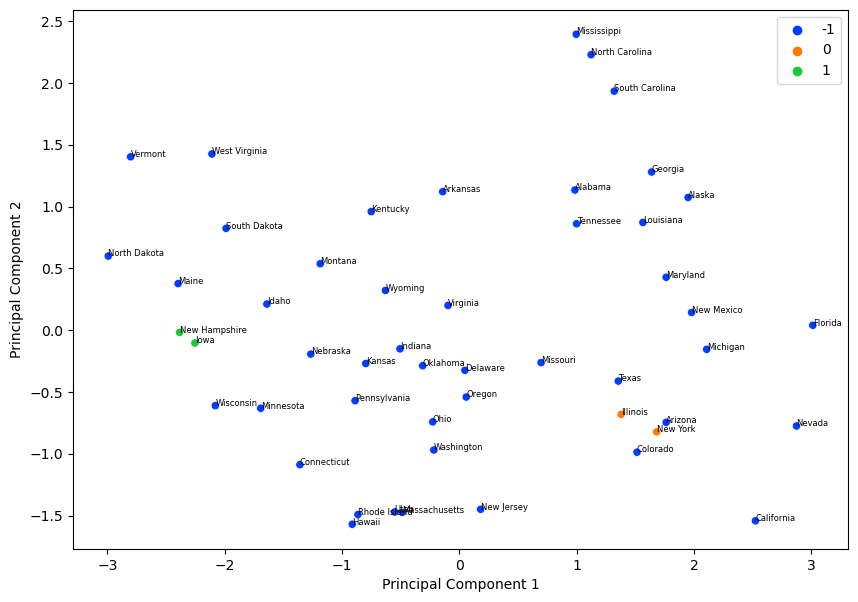

In [12]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], palette='bright',hue = clust_DB.labels_)
for i in np.arange(0,arrest.shape[0]):
    plt.text(pca_result[i,0],pca_result[i,1],list(arrest.index)[i],fontsize=6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()